
<div style="color:red;background-color:black">
Diamond Light Source
<br style="color:red;background-color:antiquewhite"><h1>Python Libraries: Numpy Broadcasting</h1>  

©2000-20 Chris Seddon 
</div>

## 1
Numpy uses **broadcasting** when arrays are different sizes.  Let's work through an example of creating a surface plot that utilises Numpy's **broadcasting**.

Consider the following simple arrays:

In [1]:
import numpy as np

X = np.arange(1,7)
Y = np.arange(1,5)
print("X and Y are 1D arrays")
print(X)
print(Y)

Y = np.vstack(Y)
print("\nY is now a 2D array")
print(Y)
print("\nX is still a 1D array")
print(X)

X and Y are 1D arrays
[1 2 3 4 5 6]
[1 2 3 4]

Y is now a 2D array
[[1]
 [2]
 [3]
 [4]]

X is still a 1D array
[1 2 3 4 5 6]


## 2
We are going to create a surface plot of a function dependent on these variables X and Y.

The X variable ranges between 1 and 6 and the Y variable between 1 and 4. This means we will have 6 * 4 = 24 points in the xy plane:

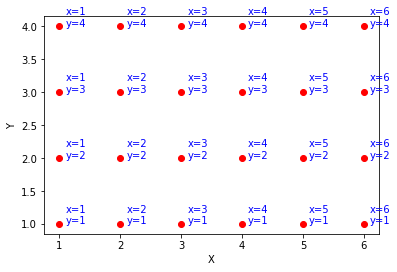

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca()

for x in range(1,7):
    for y in range(1,5):
        ax.text(x+0.1, y, f"x={x}\ny={y}", color='blue')
        ax.plot([x], [y], "ro")    
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

## 3

We will use **matplotlib** to perform the surface plot.  The plot function we will use is as follows:

* ax.plot_surface(X, Y, Z, cmap)

The X and Y parameters must both be 2 dimensional arrays that encompass all points in the xy plane that we wish to use in our surface plot.  In our case that's the 24 points shown above.

The Z values will be computed from the X an Y arrays for each of our 24 points.  The colormap is used to give artificial colors to the surface to make it easier to visualise.

The X array has to contain the values of x for each of the 24 points:

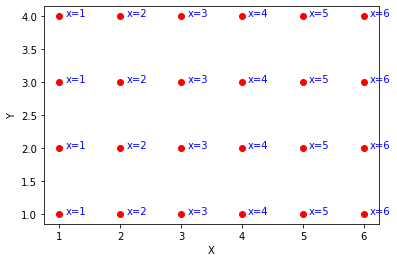

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca()

for x in range(1,7):
    for y in range(1,5):
        ax.text(x+0.1, y, f"x={x}", color='blue')
        ax.plot([x], [y], "ro")    
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

## 4
Similarly the Y array has to contain the values of y for each of the 24 points:

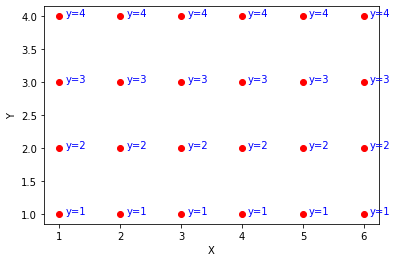

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca()

for x in range(1,7):
    for y in range(1,5):
        ax.text(x+0.1, y, f"y={y}", color='blue')
        ax.plot([x], [y], "ro")    
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

## 5
Recall that our original arrays X and Y, don't match up to these requirements.  The X array is 1 dimensional and although the Y array is 2 dimensional, it isn't the correct shape.

Let's remind ourselves of the shapes of X and Y:

In [5]:
print(f"shape of X: {X.shape}")
print(f"shape of Y: {Y.shape}")

shape of X: (6,)
shape of Y: (4, 1)


## 6
The X array is a single row of 6 elements, whereas the Y array is has 4 rows (but each row has just a single element).

Numpy uses **broadcasting** to make the shape of these two arrays the same.  In this case Numpy expands the one dimensional array X to a 4x6 two dimensional array by duplication the first row (i.e. broadcasting it):

In [6]:
print(f"X before broadcasting: \n{X}")
print(f"X after broadcasting: \n{np.broadcast_arrays(X.reshape(1,6), np.ones((4,6)))[0]}")

X before broadcasting: 
[1 2 3 4 5 6]
X after broadcasting: 
[[1 2 3 4 5 6]
 [1 2 3 4 5 6]
 [1 2 3 4 5 6]
 [1 2 3 4 5 6]]


## 7
The Y array is already two dimensional, but needs the first column to be broadcast to make it 4 x 6:

In [7]:
print(f"Y before broadcasting: \n{Y}")
print(f"Y after broadcasting: \n{np.broadcast_arrays(Y,np.ones((4,6)))[0]}")

Y before broadcasting: 
[[1]
 [2]
 [3]
 [4]]
Y after broadcasting: 
[[1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [4 4 4 4 4 4]]


## 8
Rather than use the complicated code above, Numpy provides a convenience function to create the broadcast arrays:

In [8]:
XX, YY = np.meshgrid(X, Y)
print(f"XX =\n{XX}")
print(f"YY =\n{YY}")

XX =
[[1 2 3 4 5 6]
 [1 2 3 4 5 6]
 [1 2 3 4 5 6]
 [1 2 3 4 5 6]]
YY =
[[1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [4 4 4 4 4 4]]


## 9
Now Numpy can perform element by element calculations on these arrays.  Suppose we want to compute the squares of x+y:

In [9]:
ZZ = (XX + YY)**2
print(ZZ)

[[  4   9  16  25  36  49]
 [  9  16  25  36  49  64]
 [ 16  25  36  49  64  81]
 [ 25  36  49  64  81 100]]


## 10
In practice, broadcasting is implicit (we don't need to use **meshgrid**) to calculate Z:

In [10]:
Z = (X + Y)**2
print(Z)

[[  4   9  16  25  36  49]
 [  9  16  25  36  49  64]
 [ 16  25  36  49  64  81]
 [ 25  36  49  64  81 100]]


## 11
Now we are ready to write our surface plot example.  Note that although we don't need to use *meshgrid* to perform our calculations, we still need it for the **plot_surface** function.

We also need to switch to a 3D projection to see the plot:

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d', title="Broadcasting")
ax.plot_surface(XX, YY, Z, cmap=cm.coolwarm)
plt.show()

## 12
Here is the complete example (I've omitted doing a **vstack** on the y values):

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d', title="Broadcasting")
X = np.arange(1,7)
Y = np.arange(1,5)
XX, YY = np.meshgrid(X, Y)

Z = (XX + YY)**2

ax.plot_surface(XX, YY, Z, cmap=cm.coolwarm)
plt.show()

## 13
The resulting plot is not very exciting.  To jazz things up let's increase the number of points plotted and choose a more interesting function to plot:

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d', title="Broadcasting")
X = np.arange(-5, 5, 0.01)
Y = np.arange(-5, 5, 0.01)
X, Y = np.meshgrid(X, Y)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
plt.show()